Machine learning algorithms used :
    
Logistic Regression  
KNN                     
SVM                  
AdaBoost        
Perceptron 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\DATA ANALYSIS PROJECT\real_estate.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [4]:
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
506  0.98765   0.0  12.50     0  0.561  6.980  89.0  2.0980    3  320   
507  0.23456   0.0  12.50     0  0.561  6.980  76.0  2.6540    3  320   
508  0.44433   0.0  12.50     0  0.561  6.123  98.0  2.9870    3  320   
509  0.77763   0.0  12.70     0  0.561  6.222  34.0  2.5430    3  329   
510  0.65432   0.0  12.80     0  0.561  6.760  67.0  2.9870    3  345   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

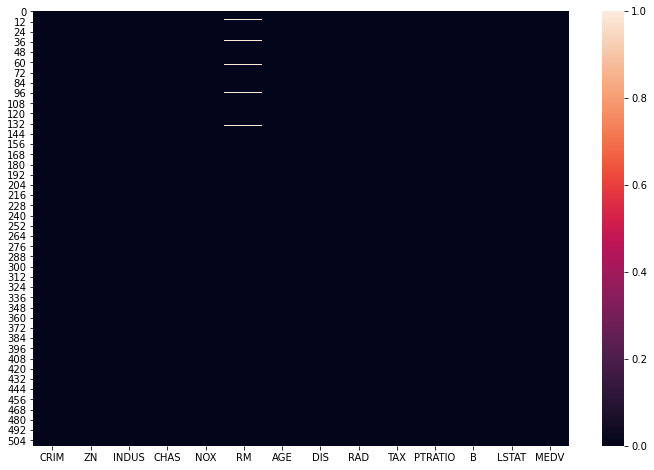

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [8]:
df["RM"] = df["RM"].fillna(df["RM"].mean())

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

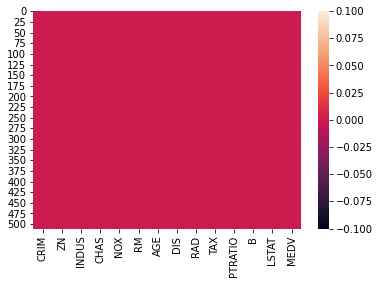

In [10]:
sns.heatmap(df.isnull())

In [11]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [12]:
x=df.drop("CHAS",axis=1)
y=df["CHAS"]

In [13]:
x.shape,y.shape

((511, 13), (511,))

In [14]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.41816246,  0.29069132, -1.29606519, ...,  0.44385344,
        -1.01409118,  0.13908299],
       [-0.41570923, -0.48476656, -0.59827044, ...,  0.44385344,
        -0.48005831, -0.11421576],
       [-0.41571156, -0.48476656, -0.59827044, ...,  0.39902654,
        -1.13604581,  1.26837325],
       ...,
       [-0.36696944, -0.48476656,  0.19774332, ..., -0.14980003,
         1.04244887,  3.30531737],
       [-0.32801455, -0.48476656,  0.22706243, ..., -0.14980003,
         8.10297964,  4.67735227],
       [-0.34242657, -0.48476656,  0.24172198, ..., -0.39210757,
         4.12340775,  0.13908299]])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
x_train.shape,x_test.shape

((408, 13), (103, 13))

# LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model_lr = LogisticRegression()
model_lr = model_lr.fit(x_train,y_train)
model_lr

LogisticRegression()

In [20]:
pred_lr = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_lr * 100

89.32038834951457

In [21]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        92
           1       0.00      0.00      0.00        11

    accuracy                           0.89       103
   macro avg       0.45      0.50      0.47       103
weighted avg       0.80      0.89      0.84       103



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [22]:
from sklearn.svm import SVC

In [23]:
model_svm = SVC()
model_svm = model_svm.fit(x_train, y_train)
model_svm

SVC()

In [24]:
pred_svm = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
accuracy_svm * 100

89.32038834951457

In [25]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        92
           1       0.00      0.00      0.00        11

    accuracy                           0.89       103
   macro avg       0.45      0.50      0.47       103
weighted avg       0.80      0.89      0.84       103



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [26]:
from sklearn.neighbors import  KNeighborsClassifier

In [27]:
model_knn = KNeighborsClassifier()
model_knn = model_knn.fit(x_train, y_train)
model_knn

KNeighborsClassifier()

In [28]:
pred_knn = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, pred_knn)
accuracy_knn * 100

90.29126213592234

In [30]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        92
           1       0.67      0.18      0.29        11

    accuracy                           0.90       103
   macro avg       0.79      0.59      0.62       103
weighted avg       0.88      0.90      0.88       103



# ADABOOST

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
model_ada = AdaBoostClassifier()
model_ada = model_ada.fit(x_train, y_train)
model_ada

AdaBoostClassifier()

In [33]:
pred_ada = model_ada.predict(x_test)
accuracy_ada = accuracy_score(y_test, pred_ada)
accuracy_ada * 100

86.40776699029125

In [34]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        92
           1       0.20      0.09      0.13        11

    accuracy                           0.86       103
   macro avg       0.55      0.52      0.53       103
weighted avg       0.82      0.86      0.84       103



# PERCEPTRON

In [35]:
from numpy import mean
from numpy import std
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [36]:
model_per = ExtraTreesClassifier()
model_per = model_per.fit(x_train, y_train)
model_per

ExtraTreesClassifier()

In [37]:
pred_per = model_per.predict(x_test)

In [38]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_per, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [41]:
mean(n_scores)*100

91.91804927099045

In [42]:
print(classification_report(y_test, pred_per))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        92
           1       0.60      0.27      0.37        11

    accuracy                           0.90       103
   macro avg       0.76      0.63      0.66       103
weighted avg       0.88      0.90      0.89       103



# CONCLUSION

In [43]:
import pandas as pd

data1 = {
  "MODEL": ["Logistic Regression","KNN ","SVM","AdaBoost","Perceptron"],
  "ACCURATE SCORE": [accuracy_lr,accuracy_knn,accuracy_svm,accuracy_ada,mean(n_scores)]
}

#load data into a DataFrame object:
df = pd.DataFrame(data1)

print(df) 

                 MODEL  ACCURATE SCORE
0  Logistic Regression        0.893204
1                 KNN         0.902913
2                  SVM        0.893204
3             AdaBoost        0.864078
4           Perceptron        0.919180


AttributeError: 'dict' object has no attribute 'sort_values'

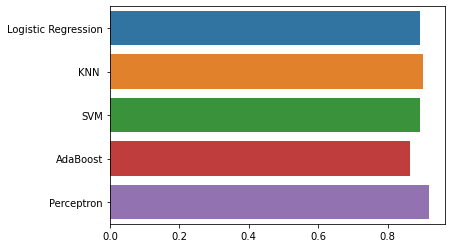

In [44]:
sns.barplot(x="ACCURATE SCORE",y="MODEL",data=data1)
data1.sort_values(by="ACCURATE SCORE",ascending=False)